<a href="https://colab.research.google.com/github/Suddhaswatta/Cats-vs-Dogs/blob/master/Kaggle_Cats_vs_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install kaggle

In [0]:
from google.colab import files

In [0]:
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"suddho","key":"5ecb6740e6746f3c4fd2280810e0a52f"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 99% 268M/271M [00:01<00:00, 165MB/s]
100% 271M/271M [00:02<00:00, 140MB/s]
 98% 533M/544M [00:05<00:00, 67.9MB/s]
100% 544M/544M [00:06<00:00, 94.3MB/s]
  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 103MB/s]


In [0]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [0]:
zipfile.ZipFile('train.zip','r').extractall()
zipfile.ZipFile('test.zip','r').extractall()


In [0]:
!mkdir -p Train/dogs
!mkdir -p Train/cats
!mkdir -p Validation/dogs
!mkdir -p Validation/cats

In [0]:
train_dir=os.path.join('','train')
train_dir_fnames=os.listdir(train_dir)
train_dir_fnames[0:3]

['cat.801.jpg', 'dog.5572.jpg', 'dog.4288.jpg']

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


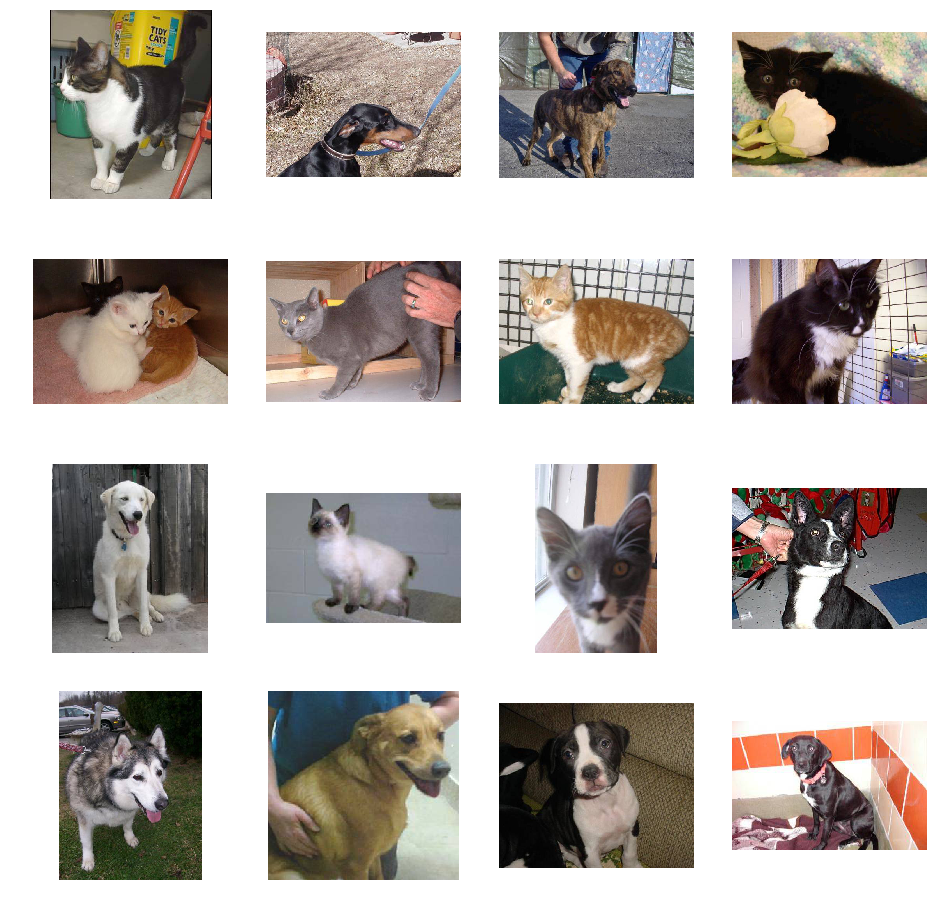

In [0]:
fig=plt.gcf()
fig.set_size_inches(16,16)
for i,image_path in enumerate(train_dir_fnames):
    img = mpimg.imread(os.path.join(train_dir,image_path))
    if i+1>4*4:break
    sb = plt.subplot(4,4,i+1)
    plt.imshow(img)
    sb.axis('Off')
plt.show()    

In [0]:
cat_path_list=[]
dog_path_list=[]

for image in train_dir_fnames:
    if 'cat' in image:
        cat_path_list.append(os.path.join(train_dir,image))
    else:
        dog_path_list.append(os.path.join(train_dir,image))
        

In [0]:
print(len(cat_path_list))
print(len(dog_path_list))

12500
12500


In [0]:
test_size=0.2
training_data_size=int((1-test_size)*len(cat_path_list))
training_data_size

10000

In [0]:
train_cat_list=cat_path_list[0:training_data_size]
train_dog_list=dog_path_list[0:training_data_size]
val_cat_list=cat_path_list[training_data_size:]
val_dog_list=dog_path_list[training_data_size:]

In [0]:
import shutil

In [0]:
def copy_to(src,dst):
    for i in src:
       shutil.copy(i,dst) 

In [0]:
cat_dir='Train/cats'
dog_dir='Train/dogs'
val_cat_dir='Validation/cats'
val_dog_dir='Validation/dogs'

In [0]:
copy_to(train_cat_list,cat_dir)
copy_to(train_dog_list,dog_dir)
copy_to(val_cat_list,val_cat_dir)
copy_to(val_dog_list,val_dog_dir)

In [0]:
print(os.listdir('Train'))
print(os.listdir('Train/cats')[0:3])
print(os.listdir('Train/dogs')[0:3])
print(os.listdir('Validation/dogs')[0:5])

['cats', 'dogs']
['cat.801.jpg', 'cat.8030.jpg', 'cat.9124.jpg']
['dog.5572.jpg', 'dog.4288.jpg', 'dog.5868.jpg']
['dog.6408.jpg', 'dog.3706.jpg', 'dog.2559.jpg', 'dog.7832.jpg', 'dog.4535.jpg']


In [0]:
batch_size=100
train_datagen = ImageDataGenerator(
    rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'Train',
    shuffle=True,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')


Found 20000 images belonging to 2 classes.


In [0]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [0]:
validation_generator = test_datagen.flow_from_directory(
        'Validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')


Found 5000 images belonging to 2 classes.


In [0]:
validation_generator.class_indices

{'cats': 0, 'dogs': 1}

In [0]:
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
        
    tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['acc'])



W0710 04:55:34.755406 140550985717632 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0710 04:55:35.081688 140550985717632 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [28]:
history = model.fit_generator(train_generator,
                              epochs=15,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/15
200/200 [==============================] - 1113s 6s/step - loss: 0.6722 - acc: 0.5688 - val_loss: 0.6257 - val_acc: 0.6768
Epoch 2/15
200/200 [==============================] - 1098s 5s/step - loss: 0.6210 - acc: 0.6582 - val_loss: 0.5916 - val_acc: 0.6750
Epoch 3/15
200/200 [==============================] - 1095s 5s/step - loss: 0.5690 - acc: 0.7082 - val_loss: 0.5258 - val_acc: 0.7334
Epoch 4/15
200/200 [==============================] - 1100s 6s/step - loss: 0.5331 - acc: 0.7384 - val_loss: 0.4314 - val_acc: 0.8060
Epoch 5/15
200/200 [==============================] - 1097s 5s/step - loss: 0.4977 - acc: 0.7658 - val_loss: 0.4966 - val_acc: 0.7500
Epoch 6/15
200/200 [==============================] - 1097s 5s/step - loss: 0.4650 - acc: 0.7825 - val_loss: 0.3627 - val_acc: 0.8376
Epoch 7/15
200/200 [==============================] - 1098s 5s/step - loss: 0.4483 - acc: 0.7896 - val_loss: 0.3386 - val_acc: 0.8570
Epoch 8/15
200/200 [==============================] - 1100s 6s

<Figure size 432x288 with 0 Axes>

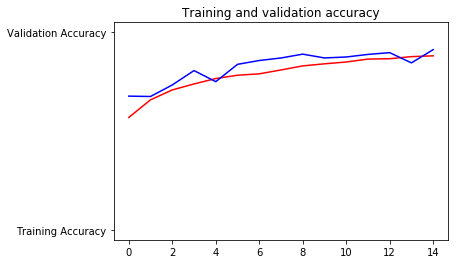

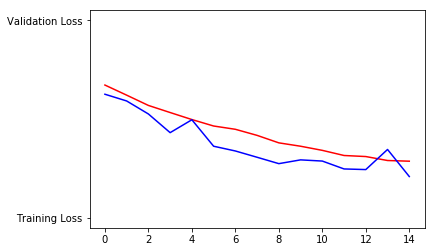

<Figure size 432x288 with 0 Axes>

In [29]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()




In [0]:
model.save("mymodel.h5")

In [38]:
print(os.listdir('test')[0:2])

['5977.jpg', '4933.jpg']


In [0]:
!mkdir -p Test/test

In [0]:
zipfile.ZipFile('test.zip','r').extractall('Test/test')

In [46]:
os.listdir('Test/test/test')[0:2]

['5977.jpg', '4933.jpg']

In [0]:
test_dir='Test/test'

In [0]:
test_data_generator=ImageDataGenerator(rescale=1./255)

In [0]:
test_generator = test_data_generator.flow_from_directory(
        test_dir,
        target_size=(150,150),
        class_mode='binary',
        )
predict = model.predict_generator(test_generator,steps=len(os.listdir('test')),verbose=1)

Found 12500 images belonging to 1 classes.
 1698/12500 [===>..........................] - ETA: 1:31:02

In [59]:
predict[0:4]

array([[9.9929005e-01],
       [3.2534480e-02],
       [9.4661689e-01],
       [5.9453171e-01],
       [8.8014287e-01],
       [8.4577799e-03],
       [9.7880900e-01],
       [8.8902980e-02],
       [8.5150337e-01],
       [9.9408197e-01],
       [3.6964387e-01],
       [9.8494613e-01],
       [4.3842196e-04],
       [9.7952163e-01],
       [9.8627365e-01],
       [6.8784767e-01]], dtype=float32)

In [0]:
test_dir_fnames=os.listdir('Test/test/test')

In [0]:
id=[]
for image_name in test_dir_fnames:
  id.append(image_name.split('.')[0])

In [74]:
id[0:6]

['5977', '4933', '1302', '3348', '7968', '7810']

In [0]:
import pandas as pd
df=pd.DataFrame()
df['id']=id

In [76]:
df.head()

,id
0,5977
1,4933
2,1302
3,3348
4,7968


In [81]:
predict[0:5]

array([[0.99929005],
       [0.03253448],
       [0.9466169 ],
       [0.5945317 ],
       [0.88014287]], dtype=float32)

In [0]:
pred_list=[1 if i>0.5 else 0 for i in predict]

In [98]:
pred_list[0:5]

[1, 0, 1, 1, 1]

In [0]:
df['label']=pred_list

In [100]:
df.head()

,id,label
0,5977,1
1,4933,0
2,1302,1
3,3348,1
4,7968,1


In [0]:
df.to_csv('prediction.csv', encoding='utf-8', index=False)